In [2]:
import math, random, os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import tensorflow as tf


2025-05-03 11:56:57.689087: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-03 11:56:57.698789: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 11:56:57.762747: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 11:56:57.818461: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746262617.886615    7640 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746262617.90

In [3]:
from sklearn.datasets import fetch_california_housing


housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(XT, X)), XT), y)

E0000 00:00:1746262623.793314    7640 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1746262623.794168    7640 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


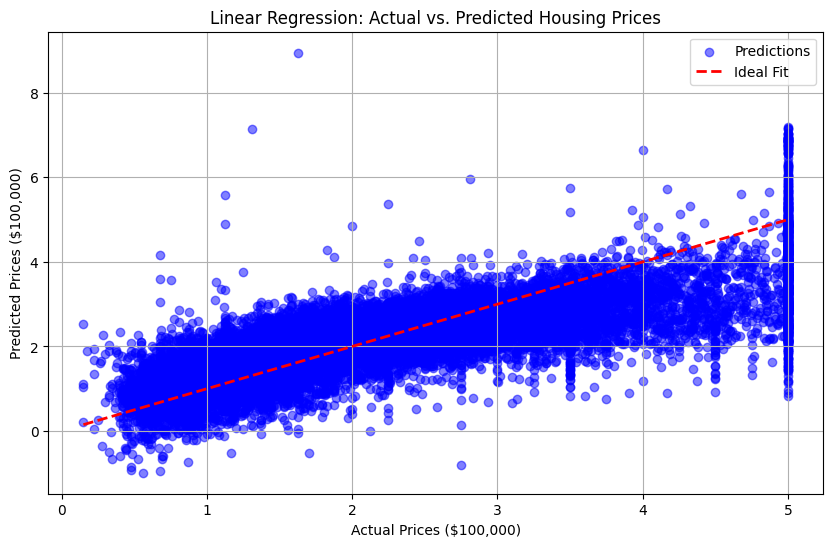

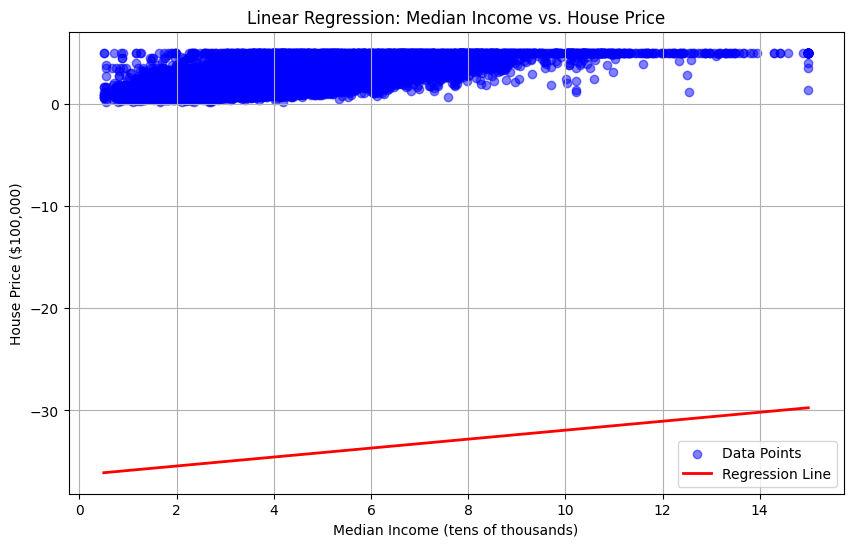

In [4]:
# Compute predictions
y_pred = tf.matmul(X, theta).numpy().flatten()  # Predicted values
y_true = y.numpy().flatten()  # Actual values

# Plot 1: Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Prices ($100,000)')
plt.ylabel('Predicted Prices ($100,000)')
plt.title('Linear Regression: Actual vs. Predicted Housing Prices')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Median Income vs. Price with Regression Line
# Median income is the 1st feature (index 0 in housing.data, index 1 in X due to bias)
median_income = housing.data[:, 0]  # First feature: MedInc
plt.figure(figsize=(10, 6))
plt.scatter(median_income, y_true, alpha=0.5, color='blue', label='Data Points')

# Compute regression line for median income
# Use theta[0] (bias) and theta[1] (weight for median income)
x_range = np.array([median_income.min(), median_income.max()])
y_range = theta.numpy()[0] + theta.numpy()[1] * x_range
plt.plot(x_range, y_range, 'r-', lw=2, label='Regression Line')

plt.xlabel('Median Income (tens of thousands)')
plt.ylabel('House Price ($100,000)')
plt.title('Linear Regression: Median Income vs. House Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
some_x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    some_y = some_x ** 2
    
gradient = tape.gradient(some_y, some_x)
print(gradient.numpy())


6.0
